In [1]:
import pandas as pd
import numpy as np

In [153]:
import seaborn as sns

In [163]:
import matplotlib.pyplot as plt

In [9]:
qst_aln = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Personal Work\Data Frames\Source\saep\CSV\\saep_qst_aluno.csv')

In [14]:
qst_aln.drop('Unnamed: 0', axis=1, inplace=True)

GABARITO:
1. Q008: Geladeira (A: uma, B: duas, C: nenhuma)
2. Q012: Carro (A: um, B: dois, C: tres, D: nenhum)
3. Q043: Reprovado: (A: Não, B: uma vez, C: duas vezes)
4. Q044: Abandono: (A: Não, B: uma vez, C: duas vezes)
5. Q040: Trabalha fora de casa: (A: sim, B: não)
6. Q019: Estudo Mãe
7. Q023: Estudo Pai

# Hiphoteses:

### Hipothesis 1:

1. Null: 15% of students have at least one fridge - Ho: p = 0.15
2. Alternative: Less than 15 % of students have at least one fridge: H1: p < 0.15

### Hiphotesis 2:

1. Null: 50% of students have at least one car at home. Ho: p = 0.5
2. Alternative: More than 50% of students have al least one car at home. H1: p > 0.5

### Hipothesis 3:

1. Null: Students with at least one graduated parent have the same proportion of **reprovement** as students with no parents graduated. Ho: p1-p2 = 0
2. Alternative: Students with at least one graduated parent have lower proportion of **reprovement** then students with no parents graduated. Ho: p1-p2 = 0

# Extracting and Cleaning Data for Hipothesis Testing

In [11]:
qst_aln.columns

Index(['Unnamed: 0', 'ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO',
       'ID_ESCOLA', 'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'ID_CAPITAL',
       'ID_TURMA', 'ID_TURNO', 'ID_SERIE', 'ID_ALUNO', 'IN_SITUACAO_CENSO',
       'IN_PROVA_BRASIL', 'IN_PREENCHIMENTO', 'TX_RESP_Q001', 'TX_RESP_Q002',
       'TX_RESP_Q003', 'TX_RESP_Q004', 'TX_RESP_Q005', 'TX_RESP_Q006',
       'TX_RESP_Q007', 'TX_RESP_Q008', 'TX_RESP_Q009', 'TX_RESP_Q010',
       'TX_RESP_Q011', 'TX_RESP_Q012', 'TX_RESP_Q013', 'TX_RESP_Q014',
       'TX_RESP_Q015', 'TX_RESP_Q016', 'TX_RESP_Q017', 'TX_RESP_Q018',
       'TX_RESP_Q019', 'TX_RESP_Q020', 'TX_RESP_Q021', 'TX_RESP_Q022',
       'TX_RESP_Q023', 'TX_RESP_Q024', 'TX_RESP_Q025', 'TX_RESP_Q026',
       'TX_RESP_Q027', 'TX_RESP_Q028', 'TX_RESP_Q029', 'TX_RESP_Q030',
       'TX_RESP_Q031', 'TX_RESP_Q032', 'TX_RESP_Q033', 'TX_RESP_Q034',
       'TX_RESP_Q035', 'TX_RESP_Q036', 'TX_RESP_Q037', 'TX_RESP_Q038',
       'TX_RESP_Q039', 'TX_RESP_Q040', 'TX_RESP_Q041', 'TX_RESP

In [20]:
q19 = qst_aln.iloc[:, [14+19]]

In [21]:
q23 = qst_aln.iloc[:, [14+23]]

In [22]:
q43 = qst_aln.iloc[:, [14+43]]

In [50]:
ungrad = ['A', 'E', 'C', 'B', 'D']
grad=['F']

In [24]:
q19.iloc[:, 0].unique()

array(['.', 'G', 'A', 'E', 'B', 'C', 'D', 'F', '*'], dtype=object)

In [31]:
q23.iloc[:, 0].unique()

array(['.', 'G', 'A', 'E', 'C', 'B', 'F', 'D', '*'], dtype=object)

In [56]:
P1 = (q19=='F').sum()/(q19.isin(ungrad)).sum() 

In [63]:
print('Proportion of students whose mother is graduated: {}'.format(round(P1[0], 4)))

Proportion of students that have graduated parents: 0.1579


In [64]:
P2 = (q23=='F').sum()/(q23.isin(ungrad)).sum() 

In [65]:
print('Proportion of students whose father is graduated: {}'.format(round(P2[0], 4)))

Proportion of students that have graduated parents: 0.1497


In [104]:
is_grad = []
for i, j in zip(q19.iloc[:, 0], q23.iloc[:, 0]): 
    
    if i=='F' or j=='F': is_grad.append(1)
    elif (i=='G' or i=='.' or i=='*') or (j=='G' or j=='.' or j=='*'): is_grad.append(2)
    else: is_grad.append(0)

is_grad = np.array(is_grad)

1. No graduated parents: 0
2. At least one graduated parent: 1

In [105]:
reproved = []
for i in q43.iloc[:, 0]: 
    
    if i=='A': reproved.append(0)
    elif (i=='.' or i=='*'): reproved.append(2)
    else: reproved.append(1)
        
reproved = np.array(reproved)

1. Never reproved: 0
2. Reproved at least once: 1

In [106]:
len(is_grad), len(reproved)

(1048575, 1048575)

In [116]:
repr_grad = reproved[is_grad==1]
repr_grad = repr_grad[repr_grad!=2]

In [118]:
repr_notgrad = reproved[is_grad==0]
repr_notgrad = repr_notgrad[repr_notgrad!=2]

#### There we have it. Our two samples to test if there is any difference in the proportion of reprovement of students who have or not graduated parents.

# Hiphotesis Testing

1. Null: Students with at least one graduated parent have the same proportion of **reprovement** as students with no parents graduated. Ho: p1-p2 = 0
2. Alternative: Students with at least one graduated parent have lower proportion of **reprovement** then students with no parents graduated. Ho: p1-p2 < 0

In [231]:
x1 = repr_notgrad         # Sample of students with no grad parent reproved or not
x2 = repr_grad            # Sample of students with grad parent 

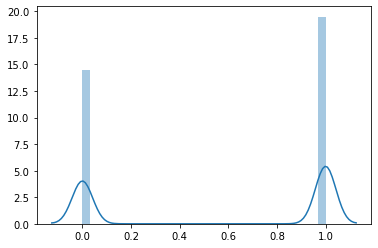

In [261]:
sns.distplot(x1[x1!=2])
#sns.distplot(x2)

In [232]:
n1 = (x1==1).sum() + (x1==0).sum()           # 0 equals never reproved
n2 = (x2==1).sum() + (x2==0).sum()           # 1 equals reproved at least once

In [233]:
p1 = ((x1==1).sum()) / n1                          # Reproved over total (reproved + not-reproved): no grad parent
p2 = ((x2==1).sum()) / n2                          # Reproved over total (reproved + not-reproved): grad parent

In [258]:
p = ((x1==1).sum() + (x2==1).sum()) / (n1 + n2)                # Total proportion of reproved students

#### Random variable p1-p2 follows normal distribution with average u, variance s.

In [255]:
p1, p2

(0.5731718859641965, 0.5975414419622971)

In [236]:
u = p1 - p2

s = (p1 * (1-p1)) / n1 + (p2 * (1-p2)) / n2
sd = np.sqrt(s)

In [237]:
[print(round(i, 6)) for i in [u, s, sd]]          # Great, small variance.

-0.02437
3e-06
0.001754


[None, None, None]

#### Standard Deviance of the difference in proportion 'p1-p2' when p1 = p2 (Null Hiphotesis)

In [239]:
s_0 = p * (1-p) * (1/n1 + 1/n2)

sd_0 = np.sqrt(s_0)

In [253]:
sd_0

0.0017621151845146753

#### Therefore we can evaluate the hiphotesis using Z:

In [252]:
z = u / sd_0

In [251]:
z

-13.829717950482582

In [254]:
norm.cdf(z, 0, 1)

8.434029890712474e-44

#### This means that if there were no difference between the proportion of reprovement between the two populations, we would never find two samples with a diference in proportion (u) as high as 0.02437 and deviance (sd) of 3 * 1/10^6

#### Normal Distribution for 0 difference in proportion p among the samples (Ho).

In [132]:
from scipy.stats import norm

In [208]:
x=np.linspace(-0.01, 0.01, 100)
y = norm.pdf(x, 0, sd_0)

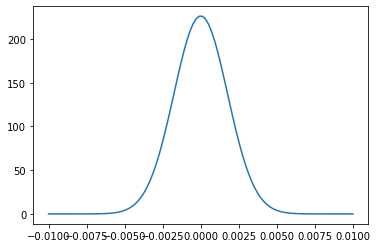

In [209]:
plt.plot(x, y)

In [256]:
norm.cdf(u, 0, sd_0)

8.434029890712474e-44